## GUI
[Link to Vercel](https://v0-simple-gui-design.vercel.app/)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Profiling

In [25]:
#import pandas as pd
#from ydata_profiling import ProfileReport

# Generate detailed EDA report
#profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)

# Save the report to an HTML file
#profile.to_file("data_profile_report_IBM.html")

## Insights (not full)

- Attrition: yes, no -> 1, 0
- No missing values
- EmployeeCount has constant value "1"
- Over18 has constant value "True"
- StandardHours has constant value "80"


## Visualization

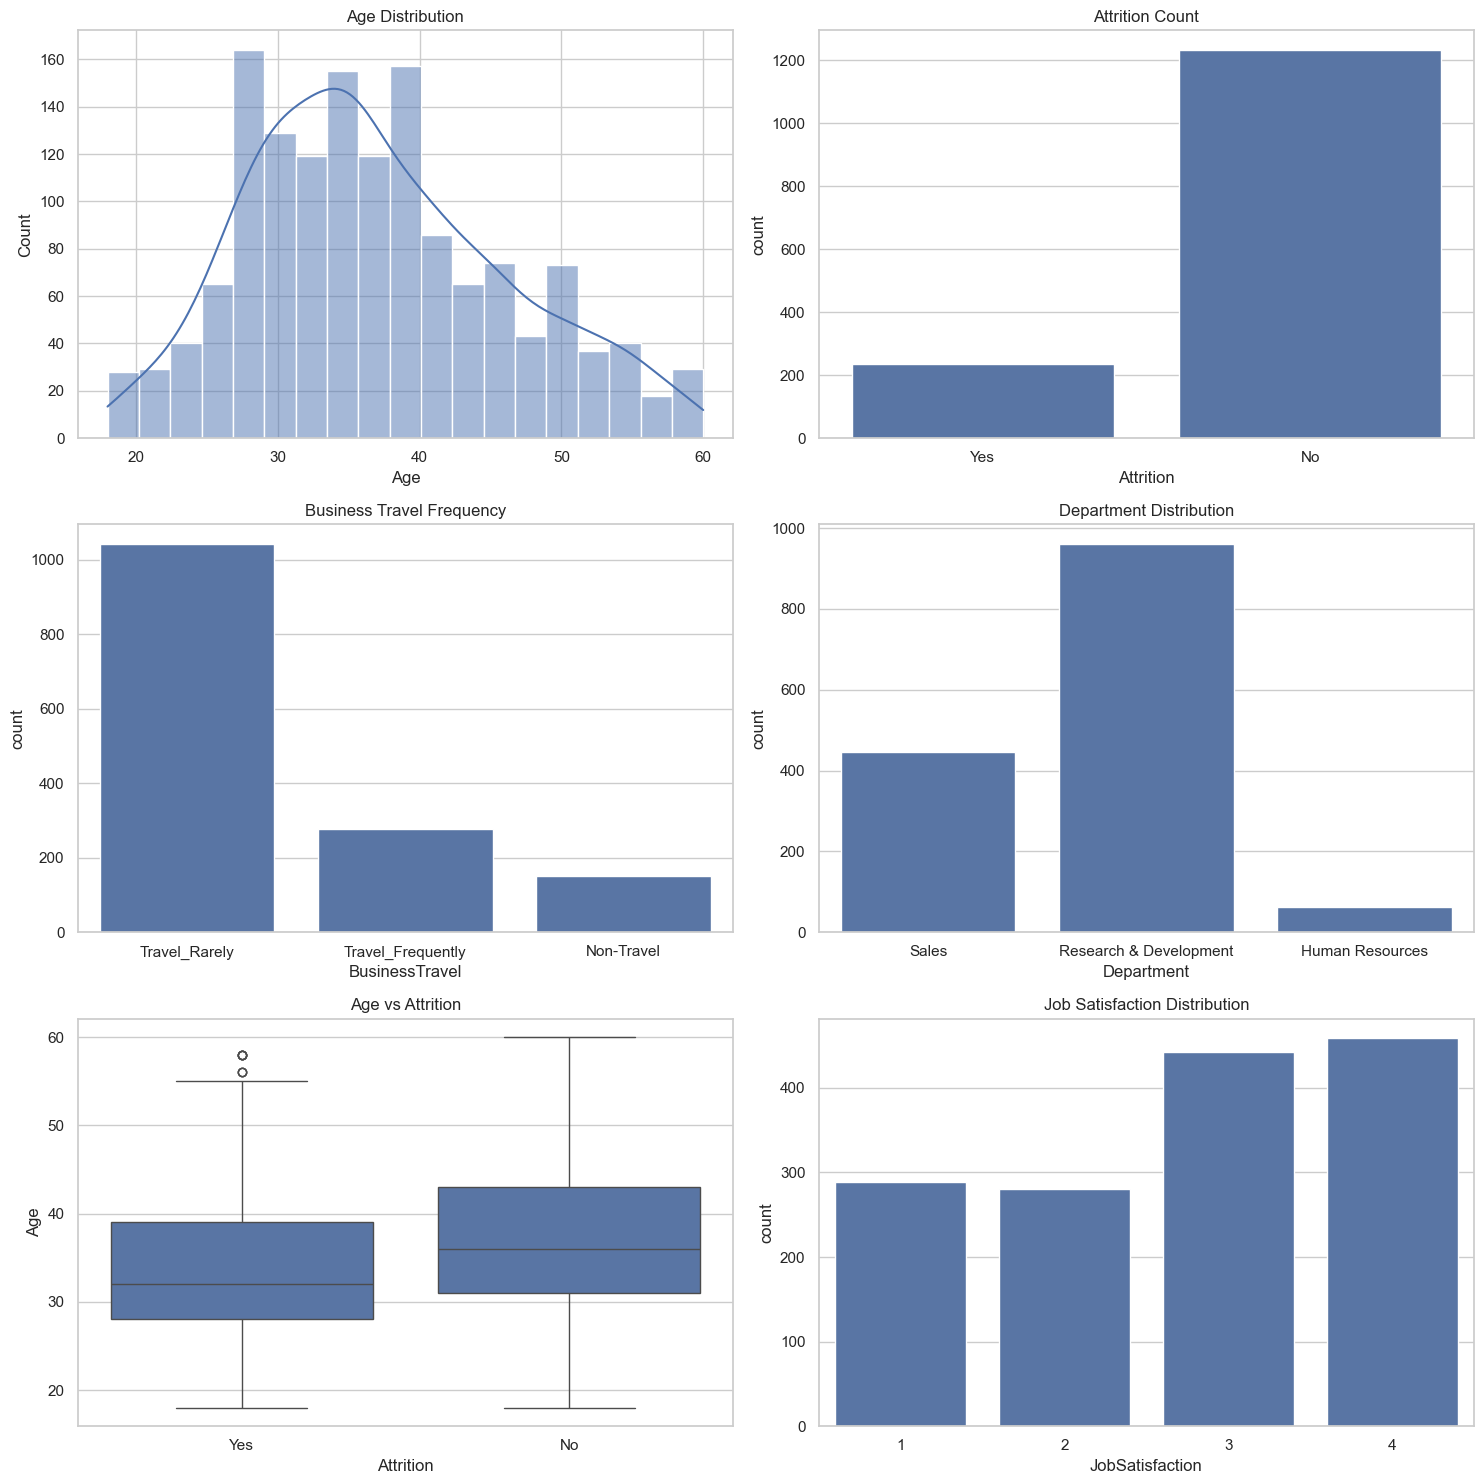

In [26]:

# Load dataset
file_path = r"C:\Users\Aser\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(file_path)  # Use pd.read_csv for CSV files

df = data

# Set seaborn style for better aesthetics
sns.set(style='whitegrid')

# Create a figure with subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# 1. Age Distribution
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# 2. Attrition Count
sns.countplot(x='Attrition', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Attrition Count')

# 3. Business Travel Frequency
sns.countplot(x='BusinessTravel', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Business Travel Frequency')

# 4. Department Distribution
sns.countplot(x='Department', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Department Distribution')

# 5. Age vs Attrition
sns.boxplot(x='Attrition', y='Age', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Age vs Attrition')

# 6. Job Satisfaction Distribution
sns.countplot(x='JobSatisfaction', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Job Satisfaction Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Pair Plot

In [27]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

# Identify numerical columns in df_final (excluding Attrition for pairplot)
numerical_cols_final = [col for col in ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 
                                        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                        'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                                        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'] 
                        if col in df.columns]

# Use full df_final with numerical columns
df_sample = df[numerical_cols_final]

# Create pairplot with only numerical columns
fig_pairplot = px.scatter_matrix(
    df_sample,
    title='Pairplot of Numerical Features',
    labels={col: col for col in df_sample.columns}
)
fig_pairplot.update_traces(diagonal_visible=True, showupperhalf=False)  # Show histograms, hide upper triangle

# Rotate x-axis and y-axis labels to vertical (90 degrees) for better fit
fig_pairplot.update_xaxes(tickangle=45, tickfont=dict(size=6))
fig_pairplot.update_yaxes(tickangle=45, tickfont=dict(size=6))

# Customize layout with larger dimensions
fig_pairplot.update_layout(
    width=2500,
    height=2500,
    showlegend=False
)

# Save to HTML
fig_pairplot.write_html('pairplot_df_final_numerical.html')

# Show plot
fig_pairplot.show()

## Heatmap

In [28]:
# Select numerical columns (including Attrition) for correlation
corr_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',  'YearsWithCurrManager']

corr_matrix = df[corr_cols].corr(method='pearson')

# Create heatmap
fig_heatmap = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.columns.tolist(),
    colorscale='RdBu',
    showscale=True,
    zmin=-1, zmax=1,
    annotation_text=np.round(corr_matrix.values, 2)
)
fig_heatmap.update_layout(
    title='Correlation Heatmap of Numeric Features',
    xaxis_title='Features',
    yaxis_title='Features'
)

# Save to HTML
fig_heatmap.write_html('correlation_heatmap.html')

# Show plot
fig_heatmap.show()


## Cleaning 1

In [29]:
# Convert Attrition from 'Yes'/'No' to 1/0
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})

# Drop columns with constant values and unique ID
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df = df.drop(columns=columns_to_drop)


## Preprocessing 2

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Optional Preprocessing - Encoding Categorical Variables
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Step 2: Further Preprocessing

# Outlier Detection and Handling
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                  'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in numerical_cols:
    df_encoded[col] = cap_outliers(df_encoded[col])

# Feature Engineering
df_encoded['YearsPerCompany'] = df_encoded['TotalWorkingYears'] / (df_encoded['NumCompaniesWorked'] + 1)
df_encoded['JobLevelVsEducation'] = df_encoded['JobLevel'] / df_encoded['Education']
df_encoded['SatisfactionScore'] = (df_encoded['EnvironmentSatisfaction'] + 
                                   df_encoded['JobSatisfaction'] + 
                                   df_encoded['RelationshipSatisfaction']) / 3


# Step 3: Additional Preprocessing

# Handling Imbalanced Data (assuming 'Attrition' is the target) ---> SMOTE(Synthetic Minority Oversampling Technique)
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature Selection -----------> Not used
selector = SelectKBest(score_func=f_classif, k=34)
X_selected = selector.fit_transform(X_resampled, y_resampled)

# Combine selected features with target for final dataset
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
df_final = pd.DataFrame(X_selected, columns=selected_features)
df_final['Attrition'] = y_resampled

# Output the final preprocessed dataset
print("Final preprocessed dataset shape:", df_final.shape)


Final preprocessed dataset shape: (2466, 35)


In [31]:
df_final

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,...,JobRole_Manager,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Single,OverTime_Yes,YearsPerCompany,JobLevelVsEducation,SatisfactionScore,Attrition
0,41.0,2.0,2.0,3.0,2.0,4.0,5993.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.888889,1.000000,2.333333,1
1,49.0,1.0,3.0,2.0,2.0,2.0,5130.0,4.0,4.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,5.000000,2.000000,3.000000,0
2,37.0,2.0,4.0,2.0,1.0,3.0,2090.0,3.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.500000,3.000000,1
3,33.0,4.0,4.0,3.0,1.0,3.0,2909.0,3.0,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,4.000000,0.250000,3.333333,0
4,27.0,1.0,1.0,3.0,1.0,2.0,3468.0,3.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.631579,1.000000,2.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,31.0,3.0,3.0,3.0,1.0,3.0,2634.0,3.0,3.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,2.314180,0.305955,3.219030,1
2462,40.0,3.0,1.0,3.0,1.0,3.0,5195.0,3.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.916599,0.534616,2.122052,1
2463,30.0,3.0,1.0,1.0,1.0,3.0,4586.0,3.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.930103,0.616362,2.626423,1
2464,22.0,1.0,2.0,2.0,1.0,1.0,2648.0,3.0,2.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.629216,0.870784,2.086144,1


## Model


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Step 1: Split the data into features (X) and target (y)
X = df_final.drop('Attrition', axis=1)
y = df_final['Attrition']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print class distribution for verification
print("Class distribution in training set:")
print(y_train.value_counts())
print("Class distribution in test set:")
print(y_test.value_counts())

# Step 2: Define models and hyperparameter grids
# Add class_weight='balanced' to handle imbalance
scale_pos_weight_value = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'SGDClassifier': SGDClassifier(loss='log_loss', max_iter=1000, class_weight='balanced', random_state=42)
}

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1.0]  # Initial learning rate for some schedules
}

# Step 3: Train, tune, and evaluate models
best_models = {}
results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    try:
        if model_name == 'LogisticRegression':
            search = GridSearchCV(
                model,
                param_grid_logreg,
                scoring='f1',
                cv=5,
                n_jobs=-1
            )
        else:
            param_grid = param_grid_rf if model_name == 'RandomForest' else param_grid_sgd
            search = RandomizedSearchCV(
                model,
                param_grid,
                n_iter=10,
                scoring='f1',
                cv=5,
                random_state=42,
                n_jobs=-1
            )
        
        # Fit the search on the training data
        search.fit(X_train, y_train)
        
        # Get the best model
        best_model = search.best_estimator_
        best_models[model_name] = best_model
        
        # Print best parameters
        print(f"Best parameters for {model_name}: {search.best_params_}")
        
        # Predict on the test set
        y_pred = best_model.predict(X_test)
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Store results
        results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc,
            'fpr': fpr,
            'tpr': tpr
        }
    except Exception as e:
        print(f"Error with {model_name}: {str(e)}")
        continue

# Step 4: Display results
print("\nModel Performance on Test Set:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1-Score: {metrics['f1']:.4f}")
    print(f"  ROC AUC: {metrics['roc_auc']:.4f}")

# Step 5: Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, metrics in results.items():
    plt.plot(metrics['fpr'], metrics['tpr'], label=f"{model_name} (AUC = {metrics['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Attrition Prediction Models')
plt.legend(loc="lower right")
plt.savefig('roc_curves.png')
plt.close()

# Step 6: Select the best model based on F1-score
best_model_name = max(results, key=lambda k: results[k]['f1'])
print(f"\nBest model based on F1-score: {best_model_name}")

Class distribution in training set:
Attrition
1    986
0    986
Name: count, dtype: int64
Class distribution in test set:
Attrition
1    247
0    247
Name: count, dtype: int64

Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 100, 'solver': 'liblinear'}

Training RandomForest...
Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}

Training SGDClassifier...
Best parameters for SGDClassifier: {'learning_rate': 'adaptive', 'eta0': 0.1, 'alpha': 0.1}

Model Performance on Test Set:

LogisticRegression:
  Accuracy: 0.9211
  Precision: 0.9370
  Recall: 0.9028
  F1-Score: 0.9196
  ROC AUC: 0.9661

RandomForest:
  Accuracy: 0.9433
  Precision: 0.9506
  Recall: 0.9352
  F1-Score: 0.9429
  ROC AUC: 0.9766

SGDClassifier:
  Accuracy: 0.5587
  Precision: 0.5438
  Recall: 0.7287
  F1-Score: 0.6228
  ROC AUC: 0.5759

Best model based on F1-score: RandomForest


## Winner: RandomForest

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Step 1: Split the data into features (X) and target (y)
X = df_final.drop('Attrition', axis=1)
y = df_final['Attrition']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print class distribution for verification
print("Class distribution in training set:")
print(y_train.value_counts())
print("Class distribution in test set:")
print(y_test.value_counts())

# Step 2: Define RandomForest model and hyperparameter grid
# Use class_weight='balanced' to handle imbalance
model = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Step 3: Train and tune the model
print("\nTraining RandomForest...")
try:
    search = RandomizedSearchCV(
        model,
        param_grid_rf,
        n_iter=20,  # Increased iterations for better tuning
        scoring='f1',
        cv=5,
        random_state=42,
        n_jobs=-1
    )
    
    # Fit the search on the training data
    search.fit(X_train, y_train)
    
    # Get the best model
    best_model = search.best_estimator_
    
    # Print best parameters
    print(f"Best parameters for RandomForest: {search.best_params_}")
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Store results
    results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr
    }
    
    # Step 4: Display results
    print("\nRandomForest Performance on Test Set:")
    print(f"  Accuracy: {results['accuracy']:.4f}")
    print(f"  Precision: {results['precision']:.4f}")
    print(f"  Recall: {results['recall']:.4f}")
    print(f"  F1-Score: {results['f1']:.4f}")
    print(f"  ROC AUC: {results['roc_auc']:.4f}")

 

except Exception as e:
    print(f"Error with RandomForest: {str(e)}")

Class distribution in training set:
Attrition
1    986
0    986
Name: count, dtype: int64
Class distribution in test set:
Attrition
1    247
0    247
Name: count, dtype: int64

Training RandomForest...
Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40}

RandomForest Performance on Test Set:
  Accuracy: 0.9453
  Precision: 0.9583
  Recall: 0.9312
  F1-Score: 0.9446
  ROC AUC: 0.9782


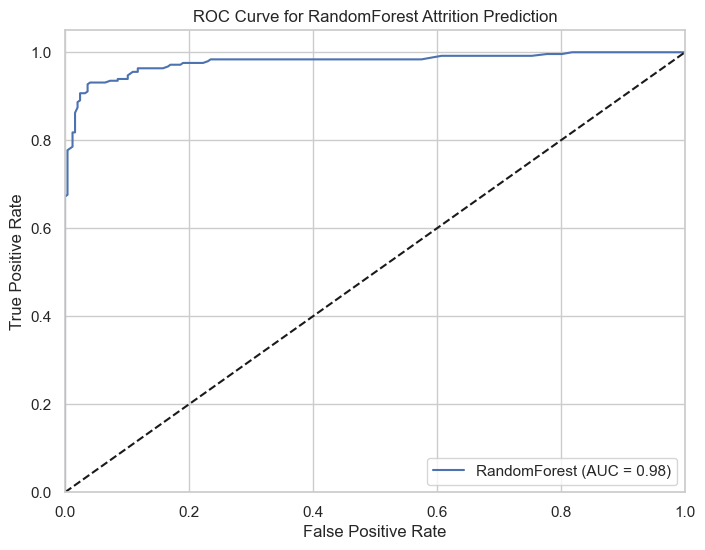

In [34]:
# Step 5: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(results['fpr'], results['tpr'], label=f"RandomForest (AUC = {results['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForest Attrition Prediction')
plt.legend(loc="lower right")
plt.show()  


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Reload dataset (if needed)
df = pd.read_csv(r"C:\Users\Aser\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

# Define columns
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                  'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
])

# Model
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Pipeline with SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

# Hyperparameters
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Search
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit
search.fit(X_train, y_train)

# Evaluate
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Print Results
print(f"Best Parameters: {search.best_params_}")
print("\nImproved Pipeline Performance on Test Set:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Improved ROC Curve - Attrition Prediction")
plt.legend(loc="lower right")
plt.savefig("improved_roc_curve.png")
plt.show()
